In [41]:
#import
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
#generate data using make_blobs
features,labels = make_blobs(
n_samples = 200,
centers = 3,
cluster_std = 2.75,
random_state=42)

In [8]:
print(features[0:5])
print(labels[0:5])

[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
[1 0 2 2 2]


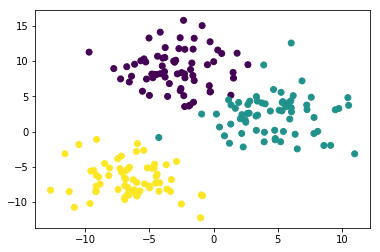

In [15]:
#plot the clusters
plt.scatter(features[:,0],features[:,1],c=labels)

In [17]:
#Standardization of data
#not required in this case, but in most practical cases, it is. 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

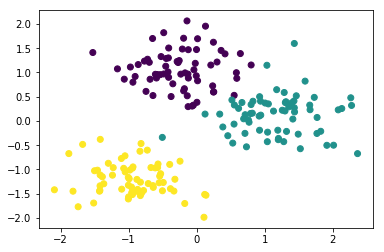

In [18]:
#how do the features look now
plt.scatter(scaled_features[:,0],scaled_features[:,1],c = labels)

In [19]:
#mean and std of data : before and after : todo

NameError: name 'mean' is not defined

In [21]:
#Instantiate k-means class object
kmeans = KMeans(
    init = "random",
    n_clusters=3,
    n_init=3,
    max_iter=100,
    random_state=42    
)

In [25]:
kmeans.fit(scaled_features)
labels_pred = kmeans.predict(scaled_features)


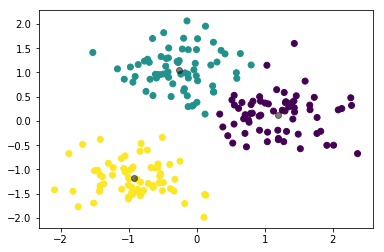

In [27]:
#plot fit and centers
plt.scatter(scaled_features[:,0],scaled_features[:,1],c = labels_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',alpha=0.5)


In [32]:
#looks good. now some analysis. 
#lowest SSE value.
print("Lowest SSE Value: ",kmeans.inertia_)

#final location of clusters
print("final location of clusters: ",kmeans.cluster_centers_)

#final iterations it took
print("total iterations taken: ", kmeans.n_init)

#final output: 

print("predicted labels: ", kmeans.labels_[0:5])
print("true labels: ", labels[0:5])

#Apparently ordering of kmeans output will not be the same as in input, becauseo f randomization. 

#print confusion matrix of actual vs predicted labels: todo: 

Lowest SSE Value:  74.57960106819854
final location of clusters:  [[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
total iterations taken:  3
predicted labels:  [0 1 2 2 2]
true labels:  [1 0 2 2 2]


In [33]:
#how to look at actual vs predicted in kmeans then? 
#just the plot? 



In [36]:
#Choosing how many clusters to have in the data
#2 techniques: 
#1. Elbow method
#2. Silhouette coefficient

#Elbow method: Iterate through different values of k and find the one with minimum SSE
sse = []
kmeans_args = {
    "init" : "random",
    "n_init" : 3,
    "max_iter" : 100,
    "random_state" :42   
}

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,**kmeans_args)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'sse')

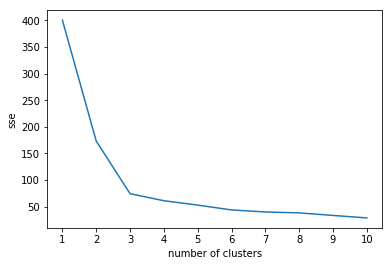

In [40]:
#knee plot
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("sse")

In [42]:
#to identify knee point programatically
kl = KneeLocator(range(1,11),
                sse,
                curve='convex',
                direction='decreasing')
kl.elbow


3

In [46]:
#Silhouette coefficient: 
silhouette_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,**kmeans_args)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coef.append(score)
    

Text(0.5, 0, 'Silhouette coefficient score')

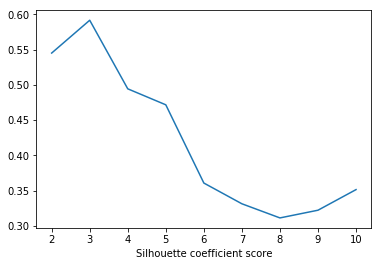

In [47]:
#Silhouette coef plot for various k
plt.plot(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.xlabel("Silhouette coefficient score")

In [48]:
##Eval cluster performance using advanced techniques
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [49]:
#make crescent type data 
features2,labels2 = make_moons(n_samples=250,
                                random_state=42,
                              noise=0.05)

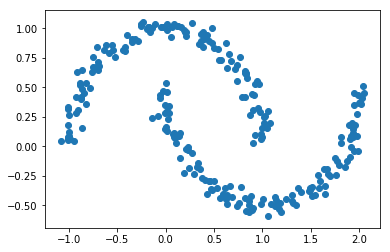

In [50]:
#plot data
plt.scatter(features2[:,0],features2[:,1])

In [54]:
#transform the data and fit it through both types of clusetering
scaled_features2 = scaler.fit_transform(features2)
kmeans2 = KMeans(n_clusters = 2)
dbscan = DBSCAN(eps=0.3)

kmeans2.fit(scaled_features2)
dbscan.fit(scaled_features2)

#compute silhouette scores for each 
kmeans_silhouette = silhouette_score(scaled_features2,kmeans2.labels_)
dbscan_silhouette = silhouette_score(scaled_features2,dbscan.labels_)

print("kmeans silhouette: ", kmeans_silhouette)
print("dbscan silhouette: ", dbscan_silhouette)

kmeans silhouette:  0.49664368674348447
dbscan silhouette:  0.37966840090456744


Text(0.5, 1.0, 'kmeans clustering')

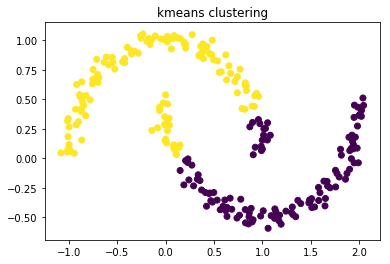

In [56]:
#plot moons
plt.scatter(features2[:,0],features2[:,1],c=kmeans2.labels_)
plt.title("kmeans clustering")

Text(0.5, 1.0, 'dbscan clustering')

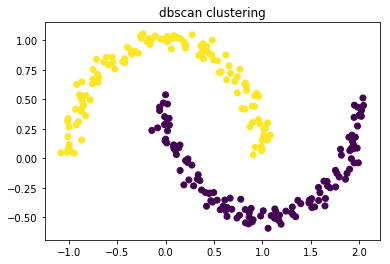

In [57]:
plt.scatter(features2[:,0],features2[:,1],c=dbscan.labels_)
plt.title("dbscan clustering")

In [58]:
#adjusted rand index as the metric since silhouette score is not really good here.
#cant u just use normal confusion matrix or just predicted correct vs actuals just about anything ? todo
ari_kmeans = adjusted_rand_score(labels2,kmeans2.labels_)
print("ari kmeans: ",ari_kmeans)

ari_dbscan = adjusted_rand_score(labels2,dbscan.labels_)
print("ari dbscan", ari_dbscan)

ari kmeans:  0.4712270735157156
ari dbscan 1.0


In [ ]:
#Real world implementation